# Definições de métodos muito utilizados ao longo do Notebook

In [134]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importante
%matplotlib inline

data_path = 'data/num/'
full_path = os.getcwd() + '/' + data_path

filenames = []

for filename in os.listdir(full_path):
    filenames.append(data_path + filename)
    
def erro(df):
    # Calcula erro
    dif = df['read'] - df['expected']
    return dif

def erro_quadratico(df):
    # Calcula erro quadrático
    dif = df['read'] - df['expected']
    return dif**2

def ignore_255(df):
    # Ignora medições maiores que 255
    return df[df['read'] < 255]

def erros_pequenos(df):
    # Considera apenas erros pequenos
    return df[(df['read'] - df['expected']) <10]

def infos_limpas(nome_do_arquivo):
    # Retorna um dataframe limpo, sem considerar outliers
    df = pd.read_csv(nome_do_arquivo)
    df = ignore_255(df)
    df = erros_pequenos(df)
    return df

def infos_sujas(nome_do_arquivo):
    # Retorna um dataframe com outliers
    df = pd.read_csv(nome_do_arquivo)
    return df

def df_infos(df):
    return df['read'].mean(), df['read'].std(), df['read'].var()

def plot_histogram():
    pass

def scatter_all():
    # Se for necessário entender onde são os pontos retornados pelo sonar
    # não tá acabada ainda
    for filename in filenames:
        df = infos_limpas(filename)
        df.plot.scatter(x='x',y='y')       

def normal_hist_df(df):
    import numpy as np
    from scipy.stats import norm
    import matplotlib.pyplot as plt

    # Generate some data for this demonstration.
    data = df

    # Fit a normal distribution to the data:
    mu, std = norm.fit(df)

    # Plot the histogram.

    plt.hist(df, normed=True, alpha=0.6, color='g', width=0.95)

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r--', 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

# Histogramas comparando exclusão de outliers

Podemos notar que sem fazer uma limpeza dos dados, não é possível chegar em valores razoáveis.

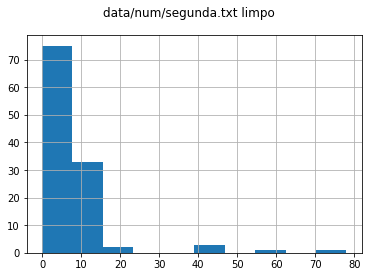

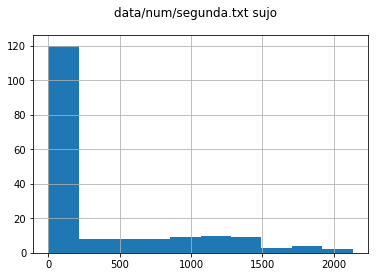

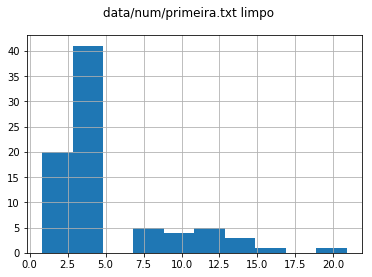

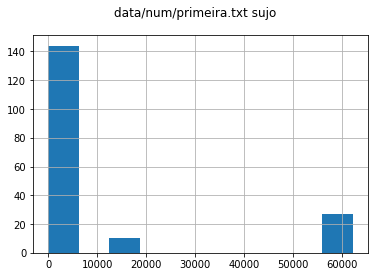

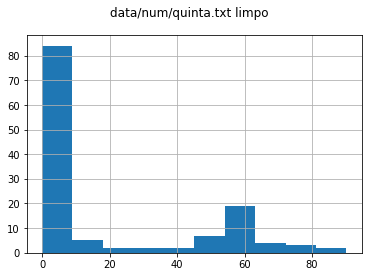

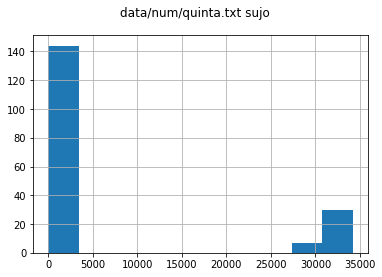

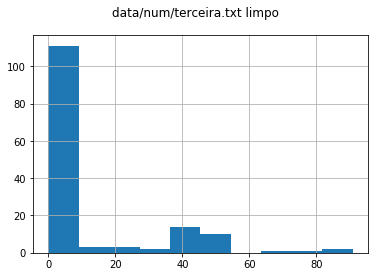

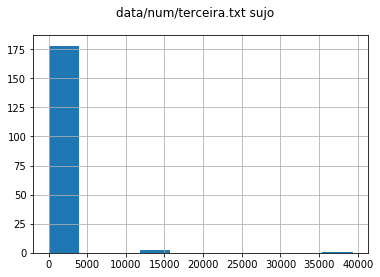

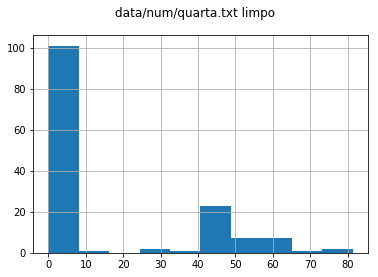

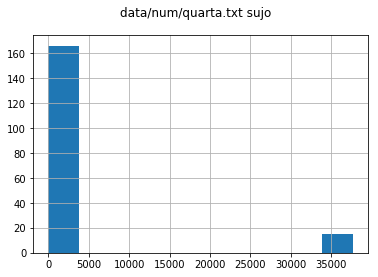

In [135]:
import pylab as pl

for filename in filenames:
    df_limpo = infos_limpas(filename)
    df_sujo = infos_sujas(filename)
    x_limpo = erro_quadratico(df_limpo)
    x_sujo = erro_quadratico(df_sujo)
    plt.figure();
    pl.suptitle(filename + ' limpo')
    x_limpo.hist()
    
    plt.figure();
    pl.suptitle(filename + ' sujo')
    x_sujo.hist()

# Modelo de incerteza (em construção)

Seguindo os conceitos passados no slide.

In [136]:
class modelo_incerteza:
    
    # criar modelo baseado em um df
    def __init__(self, df, sigma, z_min, z_max):
        self.df = df
        self.sigma = sigma
        self.z_min = z_min
        self.z_max = z_max
        
        # precisa determinar os coeficientes dessa combinação convexa
        self.w_objeto = 1
        self.w_outros = 0
        self.w_limite = 0

        pass
    
    def p_objeto(z):
        pass
    
    def p_outros(z):
        # uma representação de distribuição uniforme
        if z >= z_min and z <= z_max:
            return ((1) / (z_max - z_min))
        else:
            return 0

    def p_limites(z):
        if z == z_max:
            return 1
        else:
            return 0
        
    def prob(z):
        pass
    

# Área de testes

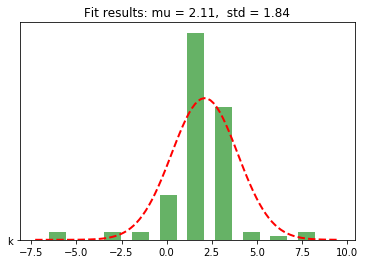

In [137]:
from scipy.stats import norm
import scipy.stats as stats

df = infos_limpas('data/num/segunda.txt')
df2 = infos_sujas('data/num/segunda.txt')
df = erro(df)
df2 = erro(df2)
normal_hist_df(df)

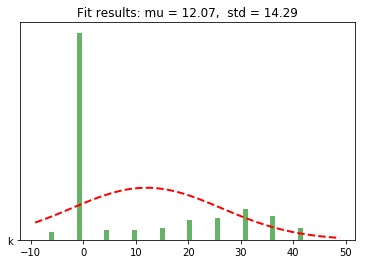

In [138]:
normal_hist_df(df2)